# Interlocking analysis for Assemblies of possibly non convex Polyhedra

In [9]:
include("../Polyhedron.jl")
include("../examples.jl")
include("../decomposition.jl")

convexDecomposition

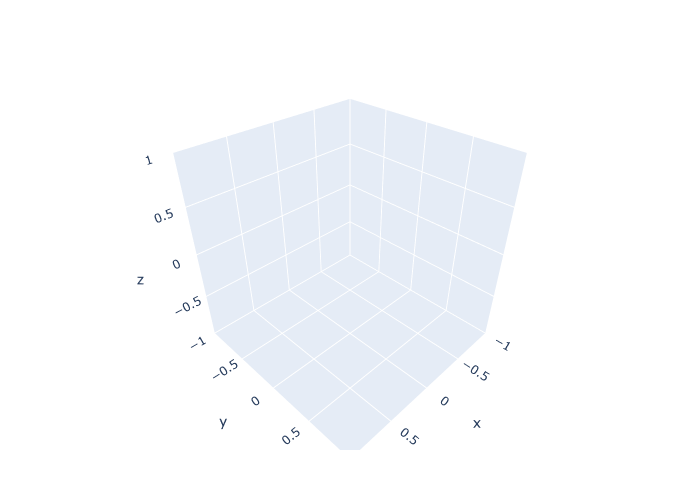

In [10]:
include("../plotting.jl")



In [14]:
poly = Dodecahedron

polyTriang = triangulatePolyhedron(poly)

facecolor = repeat(["rgb(50, 200, 200)"], length(polyTriang.facets))
mesh = mesh3d(
        x = [vert[1] for vert in polyTriang.verts],
        y = [vert[2] for vert in polyTriang.verts],
        z = [vert[3] for vert in polyTriang.verts],
        i = [triang[1] for triang in polyTriang.facets],
        j = [triang[2] for triang in polyTriang.facets],
        k = [triang[3] for triang in polyTriang.facets],
        facecolor = facecolor
    )

plot(mesh)

36-element Vector{Int64}:
  1
  4
  5
  1
  7
  8
  9
 12
 13
  9
  ⋮
  2
  8
 18
  9
 15
 17
 10
 16
 18

In [6]:
Dodecahedron.verts[[3,11,12,7,4]]

5-element Vector{Vector{Float64}}:
 [0.0, 1.41202, 0.539345]
 [0.0, 1.41202, -0.539345]
 [0.872678, 0.872678, -0.872678]
 [0.872678, -0.872678, 0.872678]
 [0.872678, 0.872678, 0.872678]

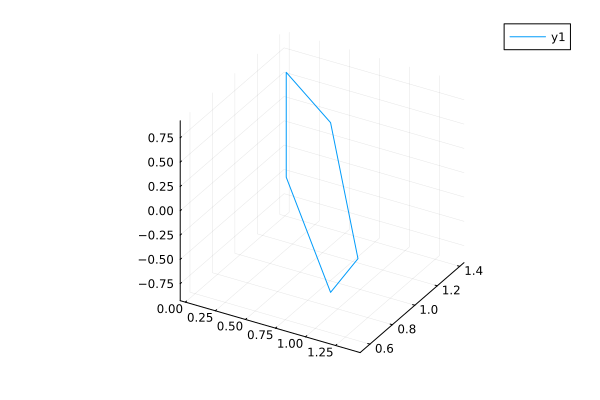

In [9]:
poly = Polyhedron(Dodecahedron.verts[[3,11,12,17,4]], [[1,2], [2,3], [3,4], [4, 5], [5,1]], [[1,2,3,4,5]])
plotPolyhedron(poly)

In [2]:
triangulatePolyhedron(Dodecahedron)

current facet:

[1, 4, 3, 5, 2]
current subfacet:[1, 4, 3, 5, 2]


current subfacet:[4, 3, 5, 2]
current subfacet:[3, 5, 2]
current facet:[1, 7, 6, 8, 2]
current subfacet:[1, 7, 6, 8, 2]
current subfacet:[7, 6, 8, 2]
current subfacet:[6, 8, 2]
current facet:[9, 12, 11, 13, 10]
current subfacet:[9, 12, 11, 13, 10]
current subfacet:[12, 11, 13, 10]
current subfacet:[

11, 13, 10]
current facet:[9, 15, 14, 16, 10]
current subfacet:[9

## Experimente

In [17]:
using GeometryBasics, GLMakie

X = [0. 1 1 2; 1 1 2 2; 0 0 1 1]
Y = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
Z = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
C = [.5 1. 1. .5; 1. .5 .5 .1667; .333 .333 .5 .5]

xyz = reshape([X[:] Y[:] Z[:]]', :)
fap = poly(connect(xyz, Point{3}), connect(1:length(X), TriangleFace); strokewidth=1)

display(fap)

GLMakie.Screen(...)

In [19]:
connect(xyz, Point{3})

12-element reinterpret(Point3{Float64}, ::TupleView{Tuple{Float64, Float64, Float64}, 3, 3, Base.ReshapedArray{Float64, 1, LinearAlgebra.Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}}):
 [0.0, 1.0, 1.0]
 [1.0, 1.0, 1.0]
 [0.0, 0.0, 0.0]
 [1.0, 1.0, 1.0]
 [1.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [1.0, 1.0, 1.0]
 [2.0, 1.0, 1.0]
 [1.0, 0.0, 0.0]
 [2.0, 1.0, 1.0]
 [2.0, 0.0, 0.0]
 [1.0, 0.0, 0.0]

In [23]:
using PolygonOps

In [26]:
inpolygon([1,0,0], [[1,0,0], [0,1,0], [0,0,1], [1,0,0]])

-1

In [31]:
a = [1,2,3]
a[a.>2]

1-element Vector{Int64}:
 3

In [2]:
using Makie.GeometryBasics


f = Figure()
Axis(f[1, 1])

poly!(Point2f[(0, 0), (2, 0), (3, 1), (1, 1)], color = :red, strokecolor = :black, strokewidth = 1)

f

UndefVarError: UndefVarError: Figure not defined

In [6]:
using Makie.GeometryBasics, GLMakie

X = [0. 1 1 2; 1 1 2 2; 0 0 1 1]
Y = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
Z = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
C = [.5 1. 1. .5; 1. .5 .5 .1667; .333 .333 .5 .5]

fap = Figure()

xyz = reshape([X[:] Y[:] Z[:]]', :)
poly!(fap, connect(xyz, Point{3}), connect(1:length(X), TriangleFace); color=C[:], strokewidth=1)

display(fap)

ErrorException: There is no current axis to plot into.

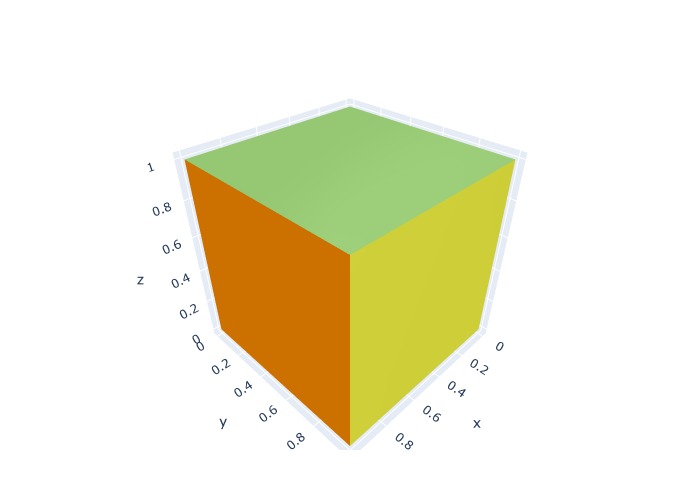

In [2]:
using PlotlyJS

p = Plot()

plot(mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    #colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=[0, 0,0,0],
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true
))

facecolor = repeat([
    "rgb(50, 200, 200)",
    "rgb(100, 200, 255)",
    "rgb(150, 200, 115)",
    "rgb(200, 200, 50)",
    "rgb(230, 200, 10)",
    "rgb(255, 140, 0)"
], inner=[2])

t = mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    i=[7, 0, 0, 0, 4, 4, 2, 6, 4, 0, 3, 7],
    j=[3, 4, 1, 2, 5, 6, 5, 5, 0, 1, 2, 2],
    k=[0, 7, 2, 3, 6, 7, 1, 2, 5, 5, 7, 6],
    facecolor=facecolor)

plot(t)
